### Install requirements txt file 
    pip install -r requirements_1.7.txt

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

### 2.	Import the country relationships file (that you created in the previous task) as a dataframe in a new notebook

In [3]:
# Import relationship data

relationship_df = pd.read_csv('country_relationships.csv', index_col = 0)

In [4]:
relationship_df

,target,value
source,,
france,russia,11
germany,russia,22
germany,italy,28
austria,germany,10
france,spain,1
...,...,...
north korea,rwanda,2
finland,russia,6
afghanistan,pakistan,6


In [6]:
relationship_df = relationship_df.reset_index()

In [7]:
relationship_df

,source,target,value
0,france,russia,11
1,germany,russia,22
2,germany,italy,28
3,austria,germany,10
4,france,spain,1
...,...,...,...
80,north korea,rwanda,2
81,finland,russia,6
82,afghanistan,pakistan,6
83,china,lebanon,1


In [8]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### 3.	Create a network object from the countries relationships dataframe

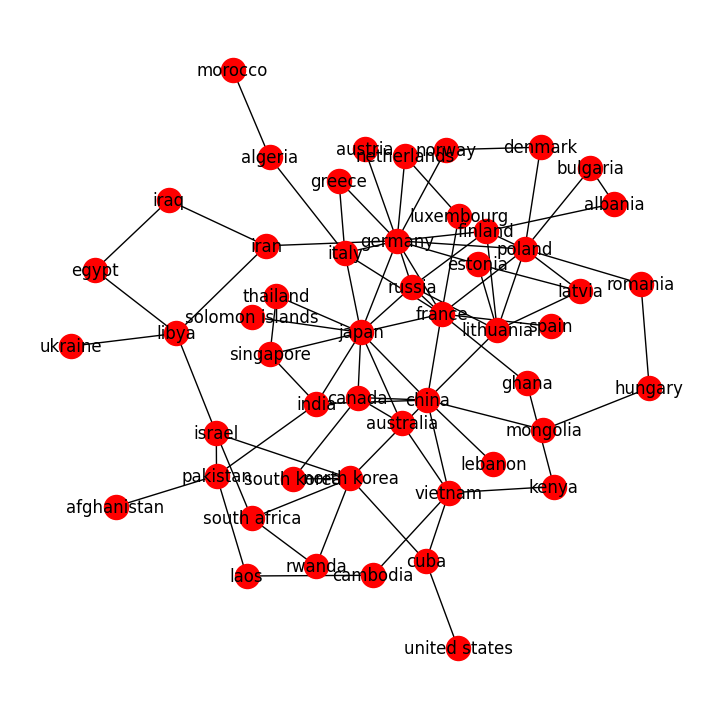

In [9]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [10]:
h.savefig('networkx_plt_countries.png')

### 4.	Create a static network graph using only NetworkX.

In [13]:

# Define net object

net = Network()
net = Network(notebook = True,width="800px", height="700px", bgcolor='#222222', font_color='white')



Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### 4.	5.	Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file

In [15]:
# Graphic visualization - pyvis
# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

### 6.	Apply the Leiden algorithm to detect any communities within the countries.

In [18]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [19]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [20]:
new_com = coms.to_node_community_map()

In [21]:
new_com

defaultdict(list,
            {'france': [0],
             'germany': [0],
             'italy': [0],
             'austria': [0],
             'spain': [0],
             'netherlands': [0],
             'luxembourg': [0],
             'greece': [0],
             'algeria': [0],
             'morocco': [0],
             'russia': [1],
             'poland': [1],
             'estonia': [1],
             'latvia': [1],
             'lithuania': [1],
             'finland': [1],
             'denmark': [1],
             'norway': [1],
             'albania': [1],
             'bulgaria': [1],
             'japan': [2],
             'china': [2],
             'thailand': [2],
             'singapore': [2],
             'australia': [2],
             'solomon islands': [2],
             'india': [2],
             'canada': [2],
             'lebanon': [2],
             'laos': [3],
             'cambodia': [3],
             'vietnam': [3],
             'kenya': [3],
             'ghana': [

In [22]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [23]:
dict_com

{'france': 0,
 'germany': 0,
 'italy': 0,
 'austria': 0,
 'spain': 0,
 'netherlands': 0,
 'luxembourg': 0,
 'greece': 0,
 'algeria': 0,
 'morocco': 0,
 'russia': 1,
 'poland': 1,
 'estonia': 1,
 'latvia': 1,
 'lithuania': 1,
 'finland': 1,
 'denmark': 1,
 'norway': 1,
 'albania': 1,
 'bulgaria': 1,
 'japan': 2,
 'china': 2,
 'thailand': 2,
 'singapore': 2,
 'australia': 2,
 'solomon islands': 2,
 'india': 2,
 'canada': 2,
 'lebanon': 2,
 'laos': 3,
 'cambodia': 3,
 'vietnam': 3,
 'kenya': 3,
 'ghana': 3,
 'cuba': 3,
 'united states': 3,
 'pakistan': 4,
 'israel': 4,
 'north korea': 4,
 'south africa': 4,
 'south korea': 4,
 'rwanda': 4,
 'afghanistan': 4,
 'libya': 5,
 'ukraine': 5,
 'egypt': 5,
 'iraq': 5,
 'iran': 5,
 'romania': 6,
 'hungary': 6,
 'mongolia': 6}

### 7.	Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell. Does the partition make sense according to history? What other conclusions can you make about the connections between the communities?

In [24]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


####  United States: Limited Edge Count
The U.S. only connects to Cuba, which is surprising given its massive global presence.

This suggests that the network prioritizes direct, significant bilateral events, rather than diplomatic or economic reach.

Not appearing more central may reflect the criteria for "key event" relationships, not the country’s actual influence 
#### WWII-Centric European Core
Countries like Germany, Poland, Japan, France, and Italy form the most connected cluster.

Their centrality aligns perfectly with World War II, the most impactful global event of the century, largely centered in Europe and the Pacific.

These countries are also highly interconnected in the graph—reflected visually through thicker, denser edge bundles. 
#### Iran, Iraq, and Israel appear within the same neighborhood of the network.

This accurately reflects regional proximity and sustained political conflict, especially during the Cold War and beyond (e.g., Iran-Iraq War, Arab-Israeli conflict).

These patterns show how geopolitical tension creates strong graph ties, even without formal alliances. 

### 8.	Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs.

#### The most key countries on the 20th century

In [25]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'france': 0.18,
 'russia': 0.1,
 'germany': 0.24,
 'italy': 0.1,
 'austria': 0.02,
 'spain': 0.02,
 'poland': 0.16,
 'estonia': 0.06,
 'latvia': 0.06,
 'lithuania': 0.12,
 'finland': 0.1,
 'denmark': 0.04,
 'norway': 0.04,
 'netherlands': 0.04,
 'luxembourg': 0.04,
 'greece': 0.04,
 'libya': 0.08,
 'ukraine': 0.02,
 'egypt': 0.04,
 'iraq': 0.04,
 'iran': 0.06,
 'japan': 0.22,
 'algeria': 0.04,
 'morocco': 0.02,
 'china': 0.18,
 'thailand': 0.04,
 'singapore': 0.06,
 'australia': 0.06,
 'solomon islands': 0.02,
 'india': 0.08,
 'pakistan': 0.08,
 'israel': 0.08,
 'north korea': 0.12,
 'south africa': 0.06,
 'laos': 0.04,
 'cambodia': 0.04,
 'vietnam': 0.1,
 'kenya': 0.04,
 'ghana': 0.04,
 'albania': 0.04,
 'bulgaria': 0.04,
 'romania': 0.04,
 'hungary': 0.04,
 'mongolia': 0.04,
 'cuba': 0.06,
 'south korea': 0.04,
 'canada': 0.08,
 'united states': 0.02,
 'rwanda': 0.04,
 'afghanistan': 0.02,
 'lebanon': 0.02}

In [26]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [27]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

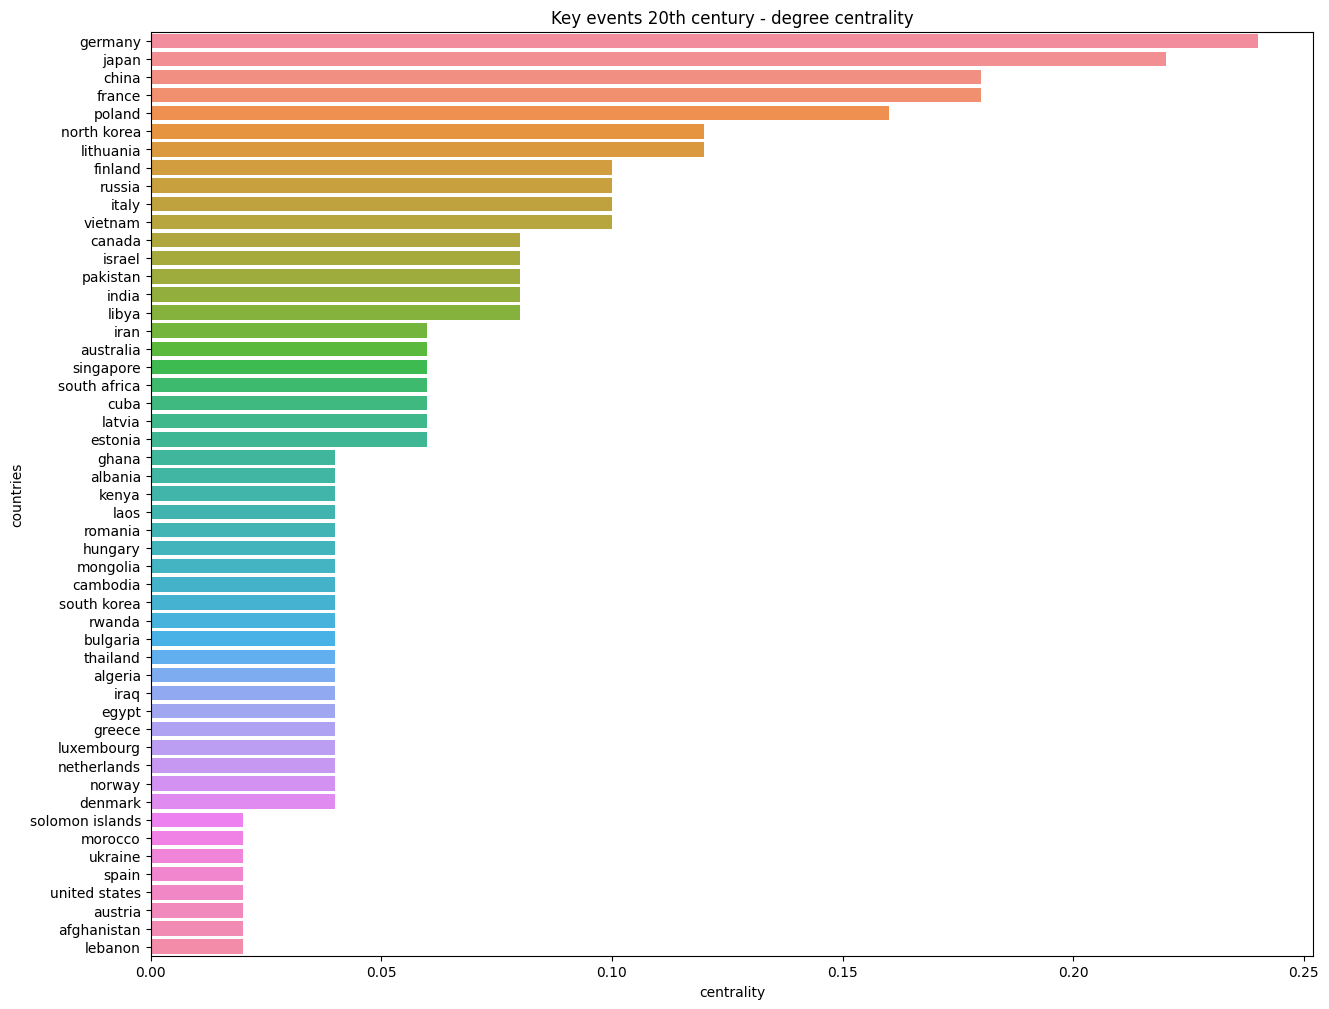

In [31]:
# Plot the degree centrality

plt.figure(figsize = (15, 12))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("Key events 20th century - degree centrality")

### Degree centrality shows the degree centrality of various countries in a network—likely built from relationships or interactions (such as alliances, conflicts, or other political/military events) during the 20th century.
#### Top Central Countries
Germany has the highest degree centrality, indicating it was the most connected or involved in key 20th-century events.
Other highly central countries include: Japan, China, France, Poland, North Korea.
These countries were all central to major 20th-century conflicts (e.g., WWII, Cold War, Korean War).
#### Cold War & WWII Influence
High centrality for Russia, United States (though relatively low), Poland, Vietnam, North Korea, South Korea, etc., aligns with Cold War dynamics.
Germany, Japan, Italy, France, and Russia were heavily involved in both world wars, explaining their prominence.
#### Unexpectedly Low Centrality
United States appears surprisingly far down. Possible reasons: Data input or edge definitions might emphasize European or conflict-heavy ties rather than diplomatic or economic influence.OR directionality or thresholds may downplay indirect influence.
#### Smaller Nations with Surprising Centrality
Lithuania, Finland, Latvia, and Estonia rank relatively high, possibly due to their roles in: WWII border conflicts, Soviet influence/sphere, 
Post-WWII reshuffling.


In [32]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [33]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

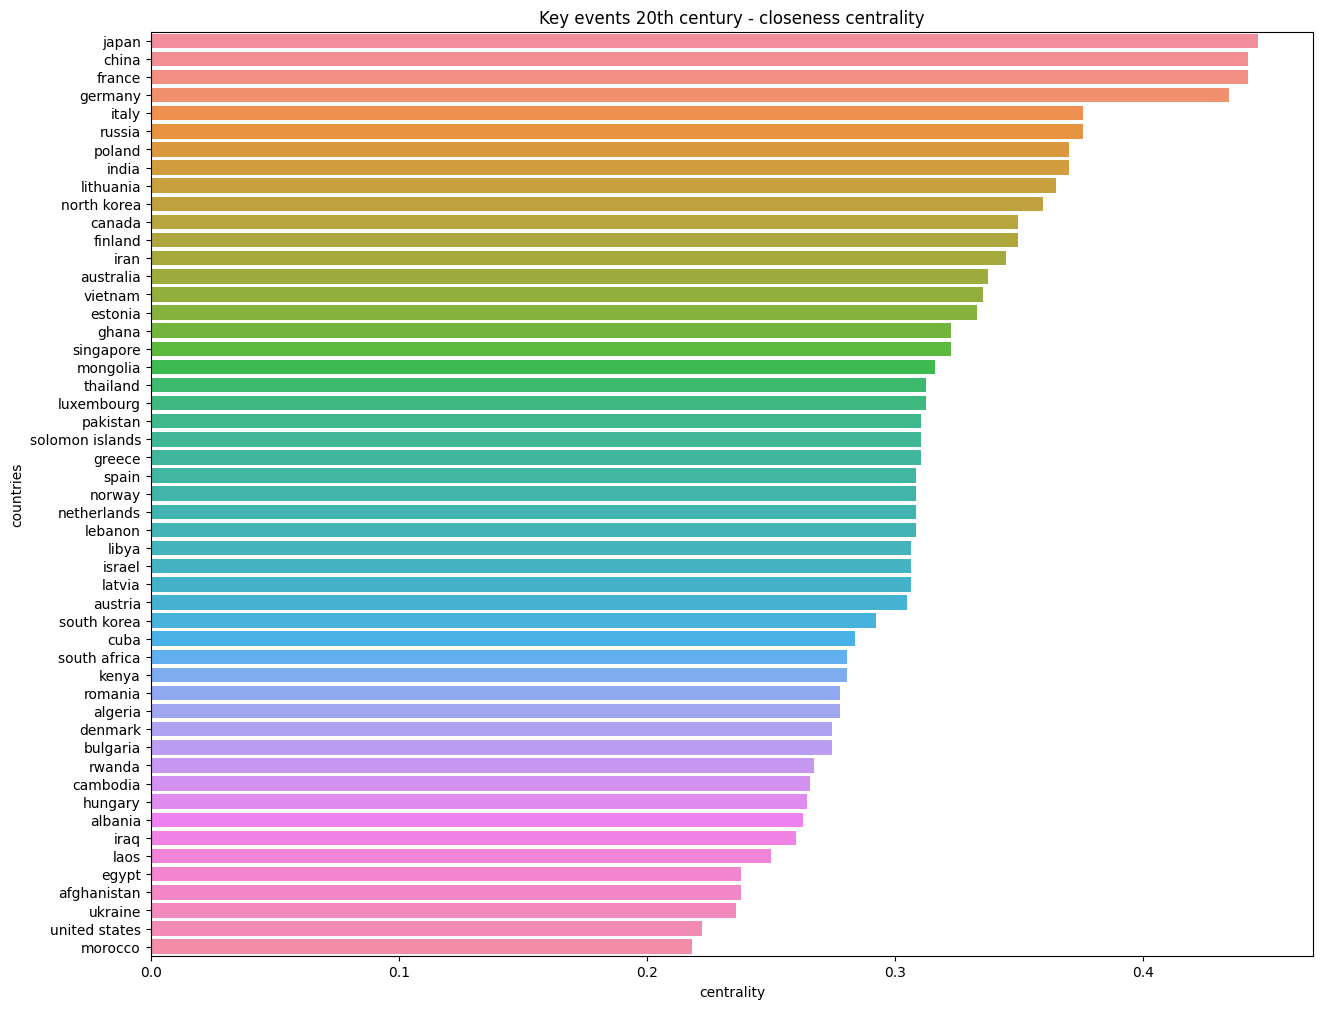

In [35]:
plt.figure(figsize = (15, 12))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("Key events 20th century - closeness centrality")

### Closeness centrality measures how near a node is to all other nodes in the network, for example, how quickly it can interact or connect indirectly to all others.
#### Top-Ranked Countries Have High Strategic Reach
Japan, China, and France top the list, followed closely by Germany and Italy. These countries can reach all others in relatively few steps, reflecting their central placement in the network. Unlike degree centrality (which counts direct links), this indicates good positioning in the network structure, not just the number of edges.
#### Strong European and Asian Core
Russia, Poland, India, Lithuania, North Korea, and Canada also score highly. This suggests that WWII and Cold War dynamics created a dense Europe–Asia connection core.
#### Middle East Still Visible but Not Highly Central
Iran, Lebanon, Israel appear mid-tier — they have important ties but aren't well-connected to all nodes. This aligns with their role in localized but intense geopolitical events rather than globally bridging ones.

In [36]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [37]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

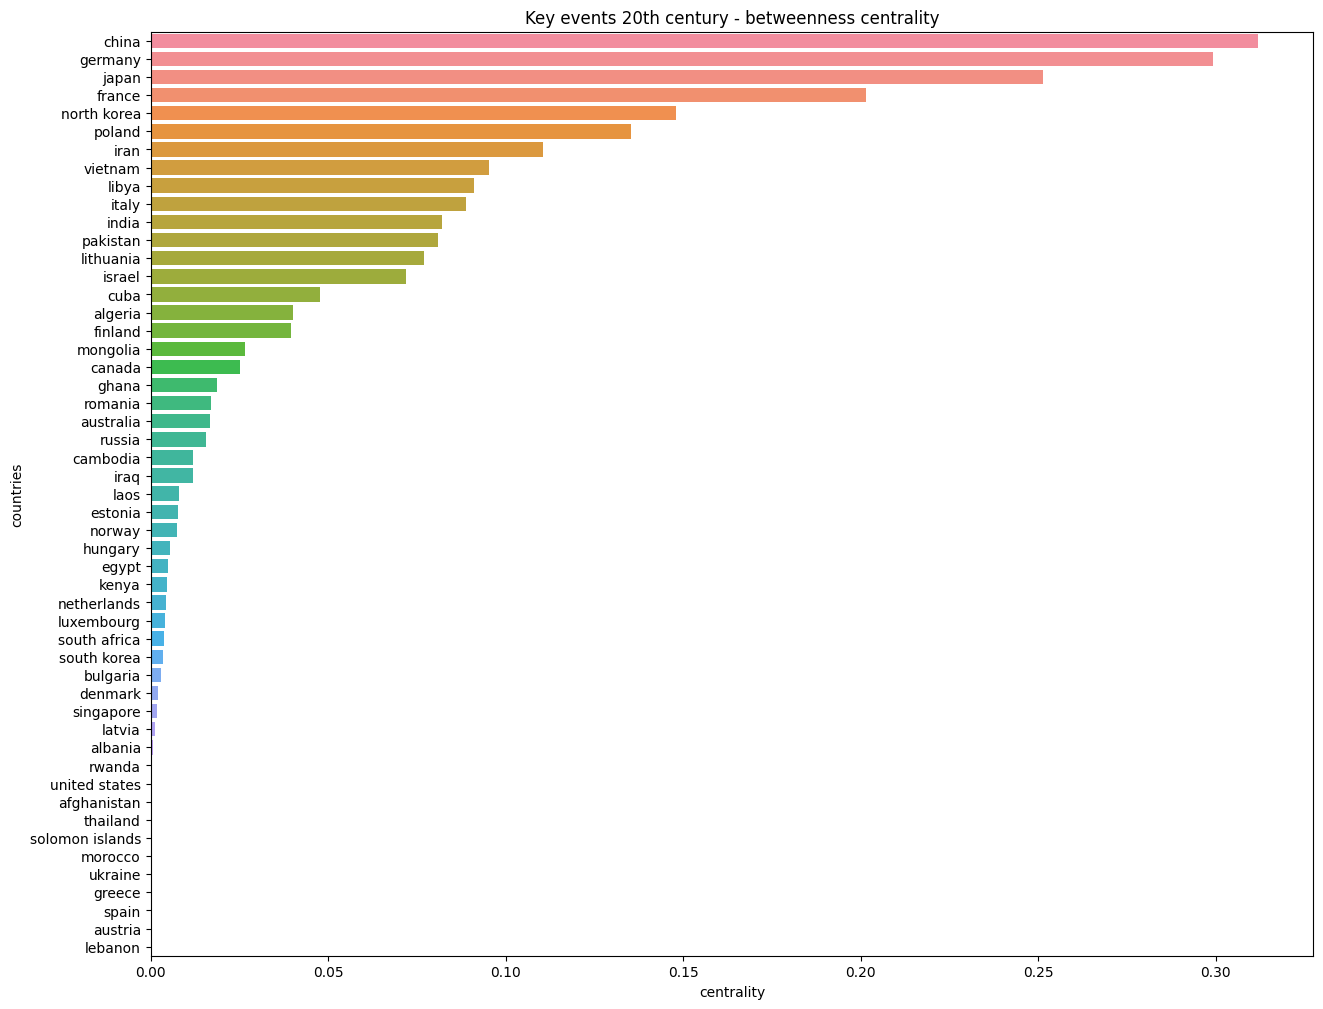

In [39]:
plt.figure(figsize = (15, 12))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("Key events 20th century - betweenness centrality")

### Betweenness centrality measures how often a country lies on the shortest path between other countries. High betweenness means a country acts as a bridge or broker in the network.
#### China & Germany are at the top
China and Germany have the highest betweenness scores, meaning they are critical intermediaries for connecting otherwise separate parts of the network. Their historical roles as major geopolitical hubs in both WWII and Cold War contexts make this unsurprising.
#### Japan & France: High Influence 
Japan and France follow closely, showing that they connect multiple sub-networks.
#### NOTE:  reviewing the text there is a major gap with this approach of studying key events, it does not take into consideration city names, which could provide more insights.  

In [40]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')